# Explore here

In [1]:
import os
import shutil

base_dir = '/workspaces/into-deep-learning/data/train'
dog_dir = os.path.join(base_dir, 'dogs')
cat_dir = os.path.join(base_dir, 'cats')

# Crear directorios si no existen
os.makedirs(dog_dir, exist_ok=True)
os.makedirs(cat_dir, exist_ok=True)

# Mover archivos de imágenes a sus carpetas correspondientes
for filename in os.listdir(base_dir):
    file_path = os.path.join(base_dir, filename)
    
    # Verificar que sea un archivo y no un directorio
    if os.path.isfile(file_path):  
        if filename.startswith('dog'):
            shutil.move(file_path, os.path.join(dog_dir, filename))
        elif filename.startswith('cat'):
            shutil.move(file_path, os.path.join(cat_dir, filename))

print("Imágenes organizadas correctamente.")


Imágenes organizadas correctamente.


2025-04-02 18:40:40.117411: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-02 18:40:40.402674: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-02 18:40:44.530124: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-02 18:40:46.362491: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743619250.141573     851 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743619250.81

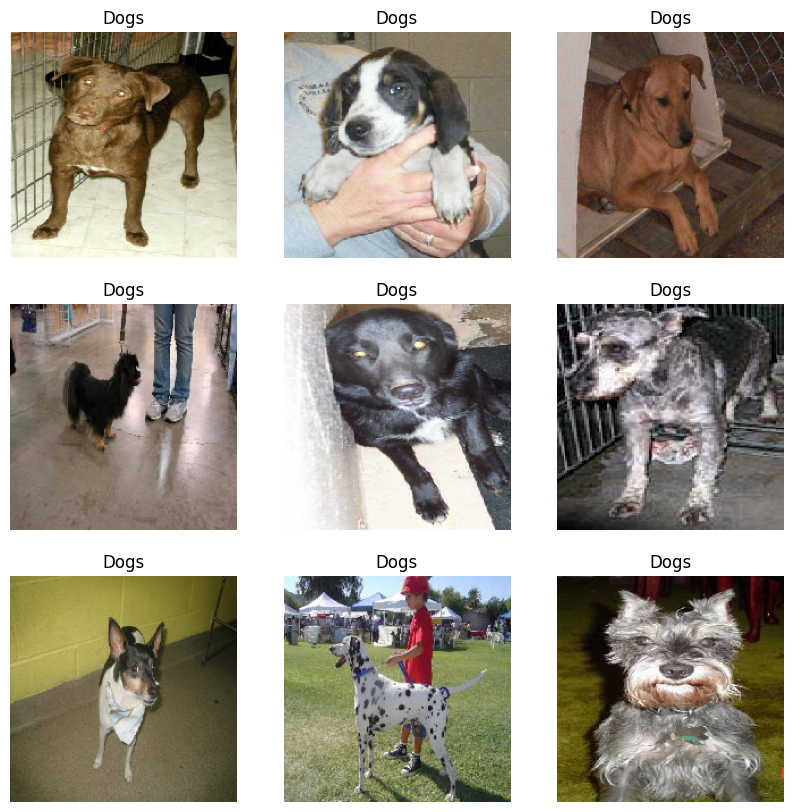

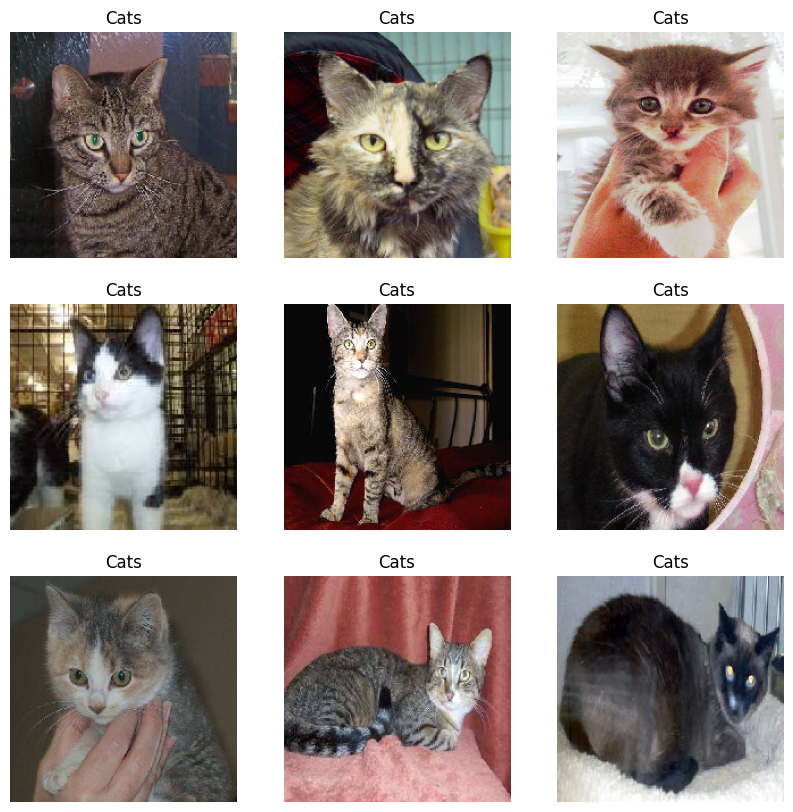

Found 16189 images belonging to 2 classes.
Found 4046 images belonging to 2 classes.


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

# Ruta de la carpeta de entrenamiento
train_dir = '/workspaces/into-deep-learning/data/train'

# Función para cargar y mostrar imágenes
def load_and_show_images(directory, label, num_images=9):
    images = []
    label_dir = os.path.join(directory, label)  # Accede a la subcarpeta correcta
    filenames = [f for f in os.listdir(label_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]  
    filenames.sort()  # Ordenar para mantener consistencia
    
    for filename in filenames[:num_images]:
        img_path = os.path.join(label_dir, filename)  # Ahora busca dentro de la subcarpeta
        img = load_img(img_path, target_size=(200, 200))
        images.append(img)
    
    return images


# Función para mostrar imágenes en una cuadrícula
def plot_images(images, title):
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(title)
        plt.axis('off')
    plt.show()

# Visualizar las primeras 9 imágenes de perros y gatos
dog_images = load_and_show_images(train_dir, 'dogs')
cat_images = load_and_show_images(train_dir, 'cats')

plot_images(dog_images, 'Dogs')
plot_images(cat_images, 'Cats')

# Uso de ImageDataGenerator para la carga eficiente de imágenes
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

ttrain_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=8,
    class_mode='binary',
    subset='training'
)

tval_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=8,
    class_mode='binary',
    subset='validation'
)


In [ ]:
# Importar las librerías necesarias
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam

# Definir el modelo CNN
model = Sequential()

# Capas convolucionales (basado en VGG16)
model.add(Conv2D(input_shape=(224, 224, 3), filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Capas densas
model.add(Flatten())
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))  # Cambiado a 1 neurona para clasificación binaria

# Compilar el modelo
model.compile(
    loss="binary_crossentropy",  # Para clasificación binaria
    optimizer=Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Entrenar el modelo
epochs = 10  # Ajustar según la necesidad
history = model.fit(
    ttrain_data,
    validation_data=tval_data,
    epochs=epochs
)

# # Guardar el modelo
# model.save("modelo_perros_gatos.h5")


/home/vscode/.local/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-02 18:08:13.168727: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/10


/home/vscode/.local/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 127/2024 ━━━━━━━━━━━━━━━━━━━━ 3:10:20 6s/step - accuracy: 0.4964 - loss: 0.9487